In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [286]:
medical_data_path = r'medical_examination.csv'

In [287]:
medical_data = pd.read_csv(medical_data_path)
medical_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


----
### Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

- `age`: Objective Feature, int (days)
- `height`: Objective Feature, int (cm)
- `weight`: Objective Feature, float (kg)
- `gender`: Objective Feature, categorical code
- `ap_hi (Systolic blood pressure)`: Examination Feature, int
- `ap_lo (Diastolic blood pressure)`: Examination Feature, int
- `cholesterol`: Examination Feature, 1: normal, 2: above normal, 3: well above normal
- `gluc (glucose)`: Examination Feature, 1: normal, 2: above normal, 3: well above normal
- `smoke`: Subjective Feature	, binary
- `alco (alcohol intake)`: Subjective Feature, binary
- `active (physical activity)`: Subjective Feature, binary
- `cardio (presence or absence of cardiovascular disease)`: Target Variable, binary

----

In [288]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [289]:
medical_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


----
### Tasks

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like `examples/Figure_1.png`.
- Clean the data. Filter out the following patient segments that represent incorrect data:
    - `diastolic pressure` is higher than `systolic` (Keep the correct data with (`df['ap_lo']` <= `df['ap_hi']`))
    - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    - height is more than the 97.5th percentile
    - weight is less than the 2.5th percentile
    - weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [290]:
# Overweight column
def overweight(height, weight):
    bmi = weight / (height / 100) ** 2
    return 1 if bmi > 25 else 0

medical_data['overweight'] = medical_data.apply(lambda row: overweight(row['height'], row['weight']), axis=1)

In [291]:
# Normalizing the data
for column in ['cholesterol', 'gluc']:
    medical_data[column] = medical_data[column].apply(lambda data: 0 if data == 1 else 1)

c:\Users\nical\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


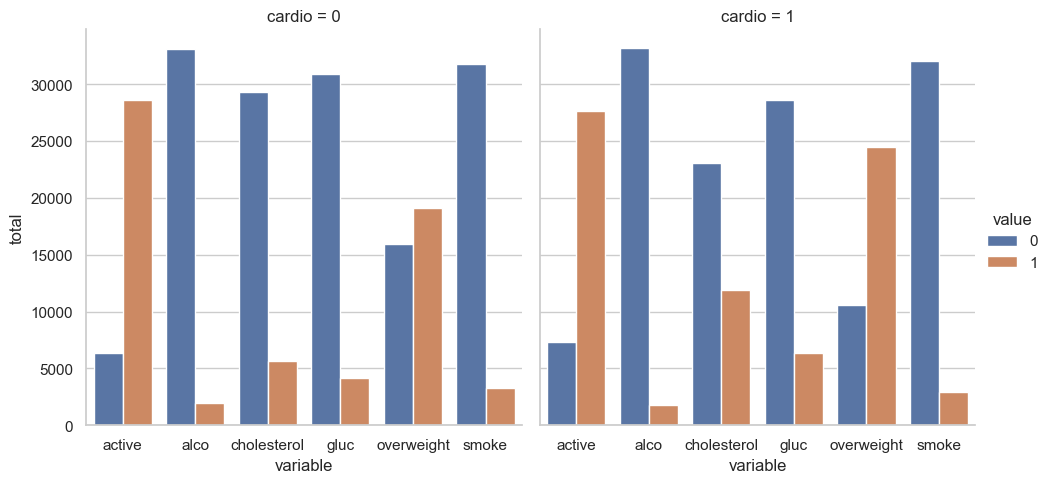

In [292]:
# Long format data
columns = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
medical_data_long = pd.melt(frame=medical_data, id_vars='cardio', value_vars=columns)

fig = sns.catplot(x='variable', kind='count', col='cardio', hue='value', data=medical_data_long)
fig.set_axis_labels(y_var='total')

In [293]:
# Cleaning the data
filter = ( 
    (medical_data['ap_lo'] <= medical_data['ap_hi']) & 
    (medical_data['height'] >= medical_data['height'].quantile(0.025)) & (medical_data['height'] <= medical_data['height'].quantile(0.975)) &
    (medical_data['weight'] >= medical_data['weight'].quantile(0.025)) & (medical_data['weight'] <= medical_data['weight'].quantile(0.975))
    )

medical_data = medical_data[filter]

<Axes: >

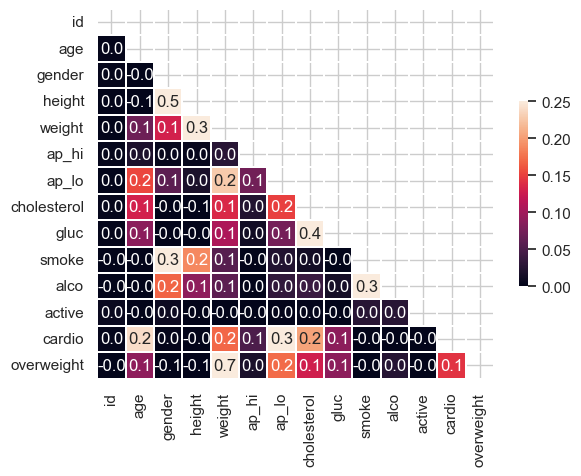

In [294]:
# Creating a correlation heatmap
medical_data_correlation = medical_data.corr()

mask = np.triu(np.ones_like(medical_data_correlation, dtype=bool))

sns.heatmap(medical_data_correlation, vmin=0.00, vmax=0.25, linewidths=0.01, annot=True, fmt='.1f', cbar_kws={'shrink':.50}, mask=mask)